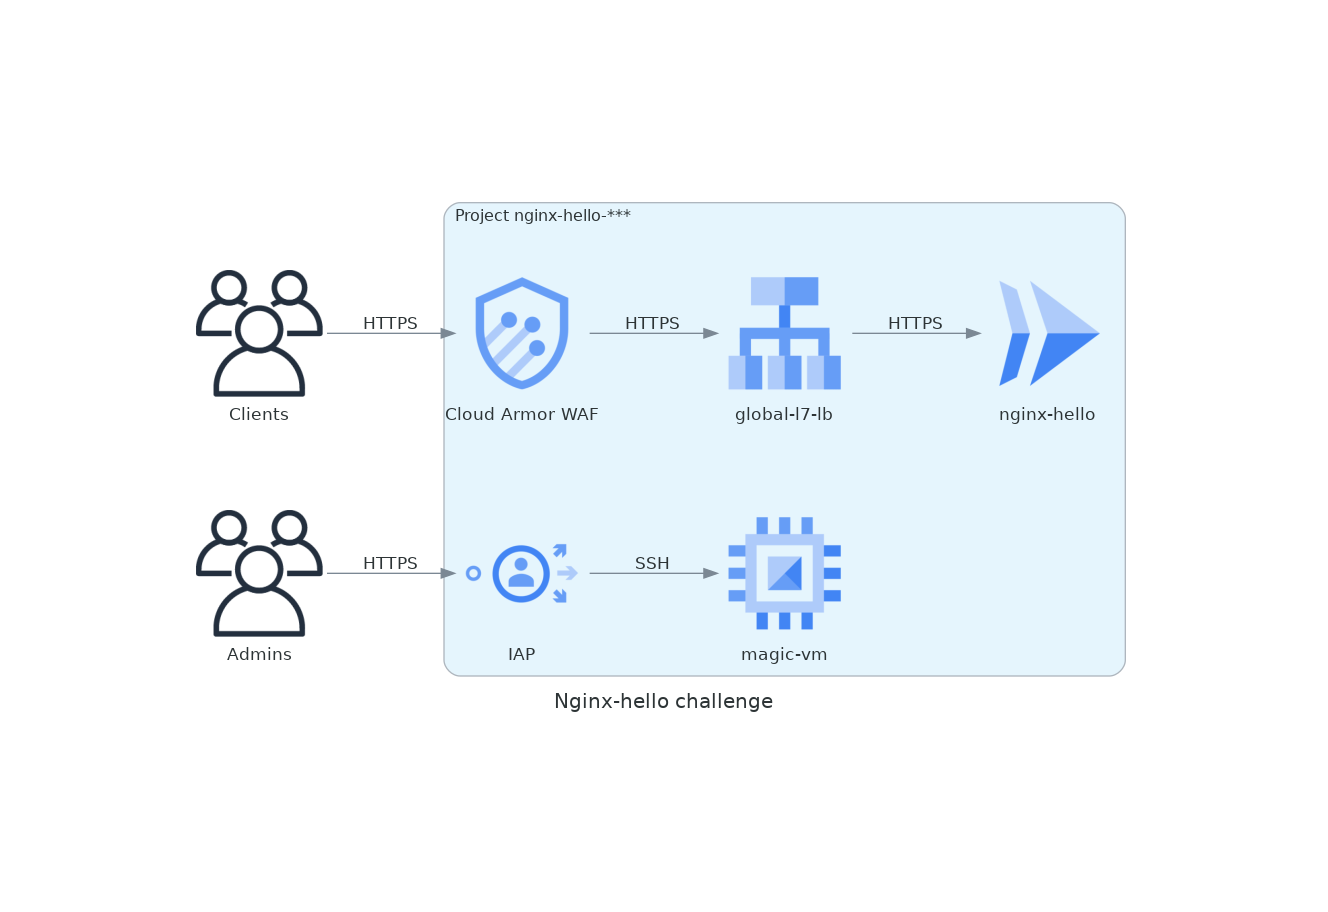

In [10]:
from diagrams import Cluster, Diagram, Edge
from diagrams.gcp.network import LoadBalancing
from diagrams.gcp.compute import Run
from diagrams.gcp.compute import GCE
from diagrams.gcp.network import Network
from diagrams.gcp.network import Armor
from diagrams.gcp.security import IAP
from diagrams.onprem.client import Users

with Diagram("Nginx-hello challenge", show=False) as diag:

    users = Users("Clients")
    admin = Users("Admins", color="red")

    with Cluster("Project nginx-hello-***"):
        
        armor = Armor("Cloud Armor WAF")
        loadbalancing = LoadBalancing("global-l7-lb")
        cloudrun = Run("nginx-hello")
        

        iap = IAP("IAP")
        vm = GCE("magic-vm")
        
    users >> Edge(label="HTTPS") >> armor >> Edge(label="HTTPS") >> loadbalancing >> Edge(label="HTTPS") >> cloudrun
    admin >> Edge(label="HTTPS") >> iap >> Edge(label="SSH") >> vm

diag
